# **Importación de datos**


In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


# **Análisis de facturación**



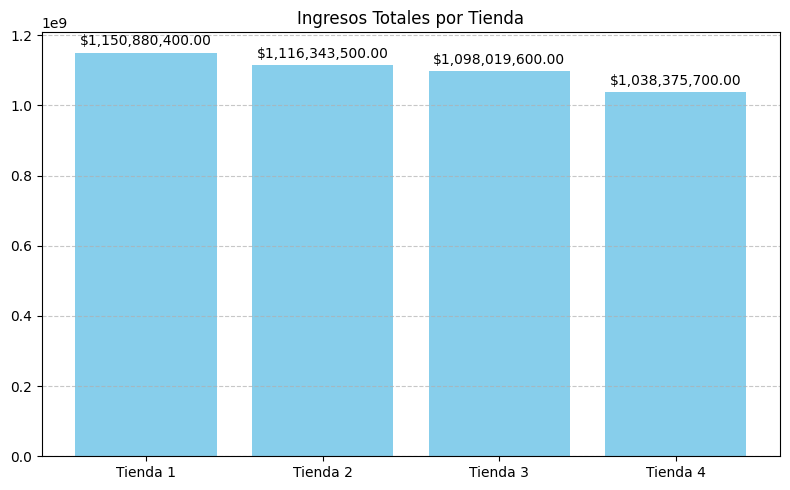

In [ ]:
import matplotlib.pyplot as plt

# Ingresos de cada tienda
ingresos = [
    tienda['Precio'].sum(),
    tienda2['Precio'].sum(),
    tienda3['Precio'].sum(),
    tienda4['Precio'].sum()
]

# Nombres de las tiendas
tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']

# Crear gráfica de barras
plt.figure(figsize=(8, 5))
plt.bar(tiendas, ingresos, color='skyblue')
plt.title('Ingresos Totales por Tienda')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Agregar etiquetas sobre las barras
for i, ingreso in enumerate(ingresos):
    plt.text(i, ingreso + max(ingresos)*0.01, f"${ingreso:,.2f}", ha='center', va='bottom')

plt.show()


# **Ventas por categoría**

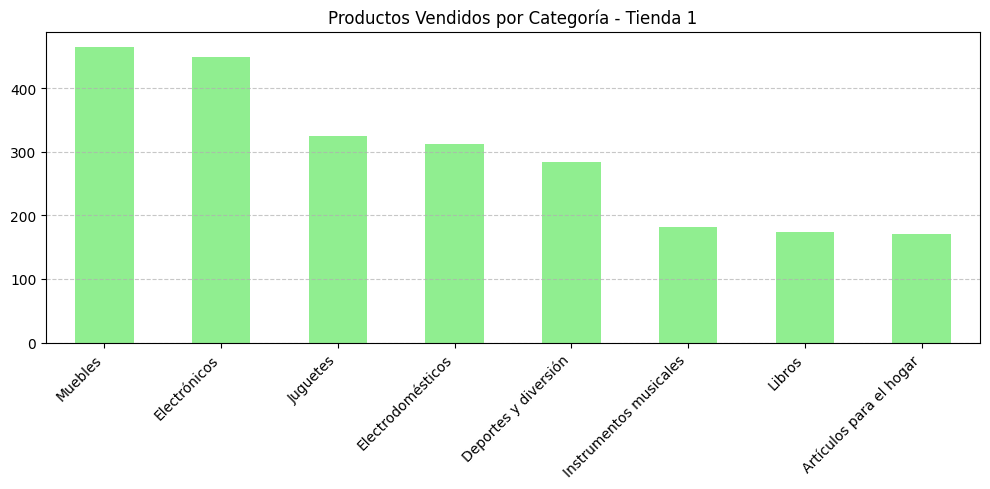

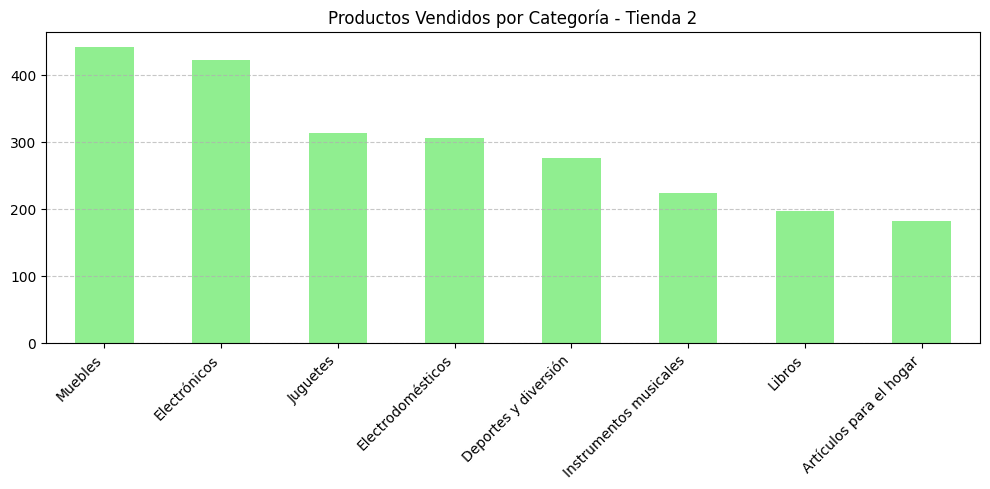

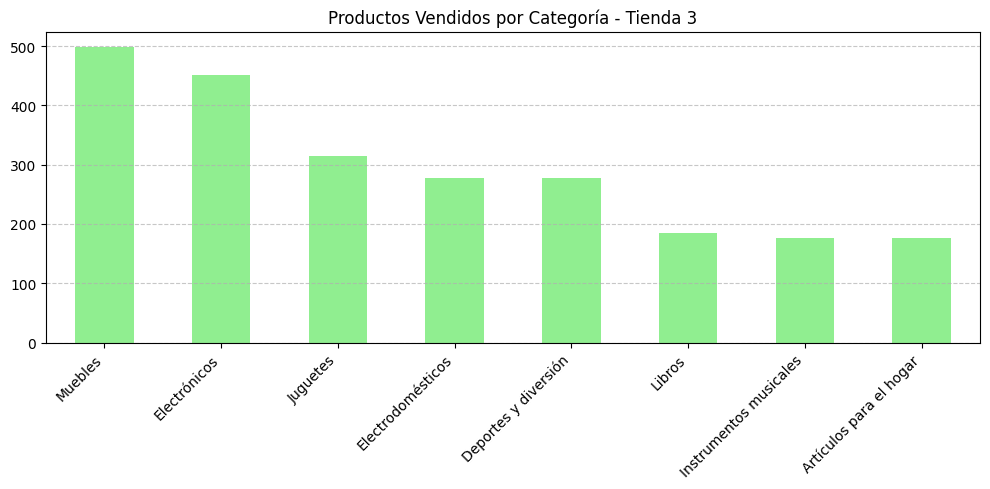

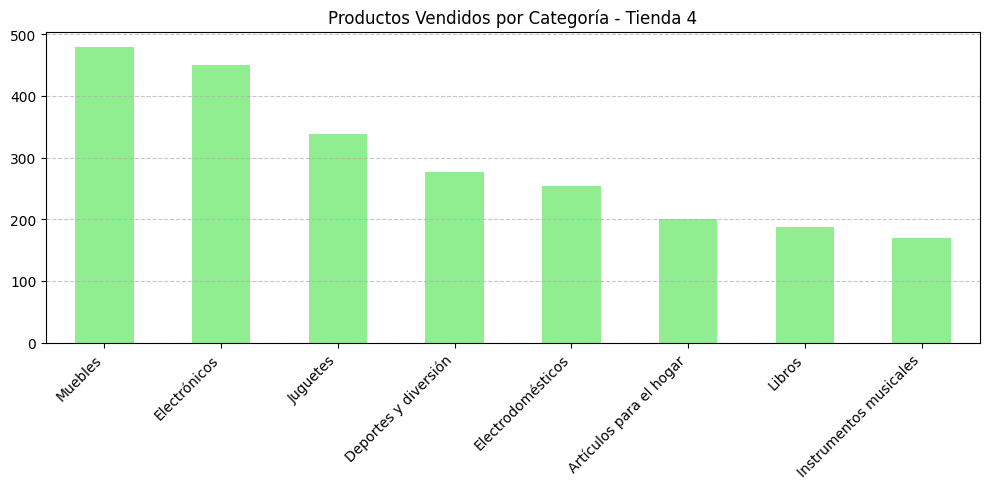

In [ ]:
import matplotlib.pyplot as plt

# Crear una función para graficar categorías de productos vendidos por tienda
def graficar_categorias(data, nombre_tienda):
    # Contar el número de productos por categoría
    categorias = data['Categoría del Producto'].value_counts()

    # Graficar las categorías de productos
    plt.figure(figsize=(10, 5))
    categorias.plot(kind='bar', color='lightgreen')
    plt.title(f'Productos Vendidos por Categoría - {nombre_tienda}')
    plt.xlabel('')
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Llamar a la función para graficar cada tienda
graficar_categorias(tienda, "Tienda 1")
graficar_categorias(tienda2, "Tienda 2")
graficar_categorias(tienda3, "Tienda 3")
graficar_categorias(tienda4, "Tienda 4")


# **Calificación promedio de la tienda**


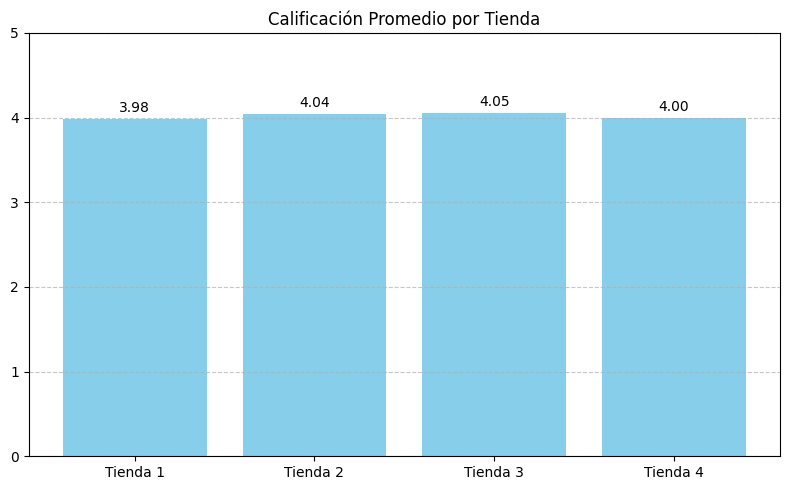

In [ ]:
import matplotlib.pyplot as plt

# Ingresos de calificación promedio por tienda
calificaciones_promedio = [
    calificacion_promedio_tienda_1,
    calificacion_promedio_tienda_2,
    calificacion_promedio_tienda_3,
    calificacion_promedio_tienda_4
]

# Nombres de las tiendas
tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']

# Crear gráfico de barras
plt.figure(figsize=(8, 5))
plt.bar(tiendas, calificaciones_promedio, color='skyblue')
plt.title('Calificación Promedio por Tienda')
plt.ylim(0, 5)  # Suponiendo que la calificación está en una escala de 0 a 5
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Agregar etiquetas sobre las barras
for i, calificacion in enumerate(calificaciones_promedio):
    plt.text(i, calificacion + 0.05, f"{calificacion:.2f}", ha='center', va='bottom')

plt.show()



# **Productos más y menos vendidos**

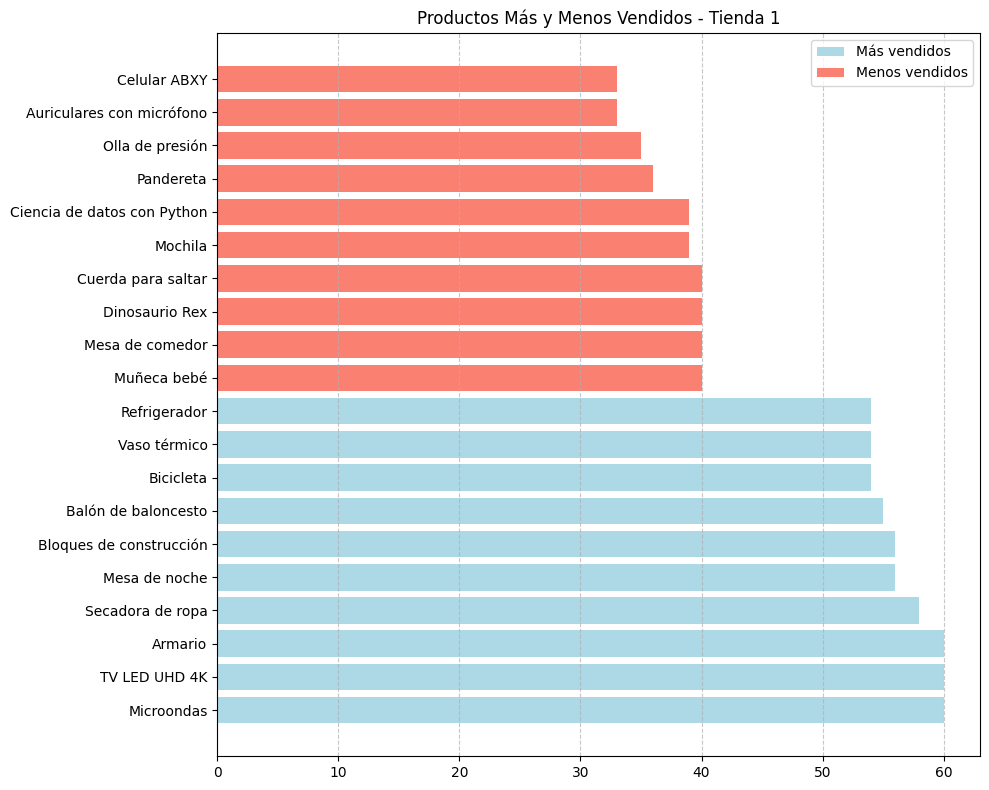

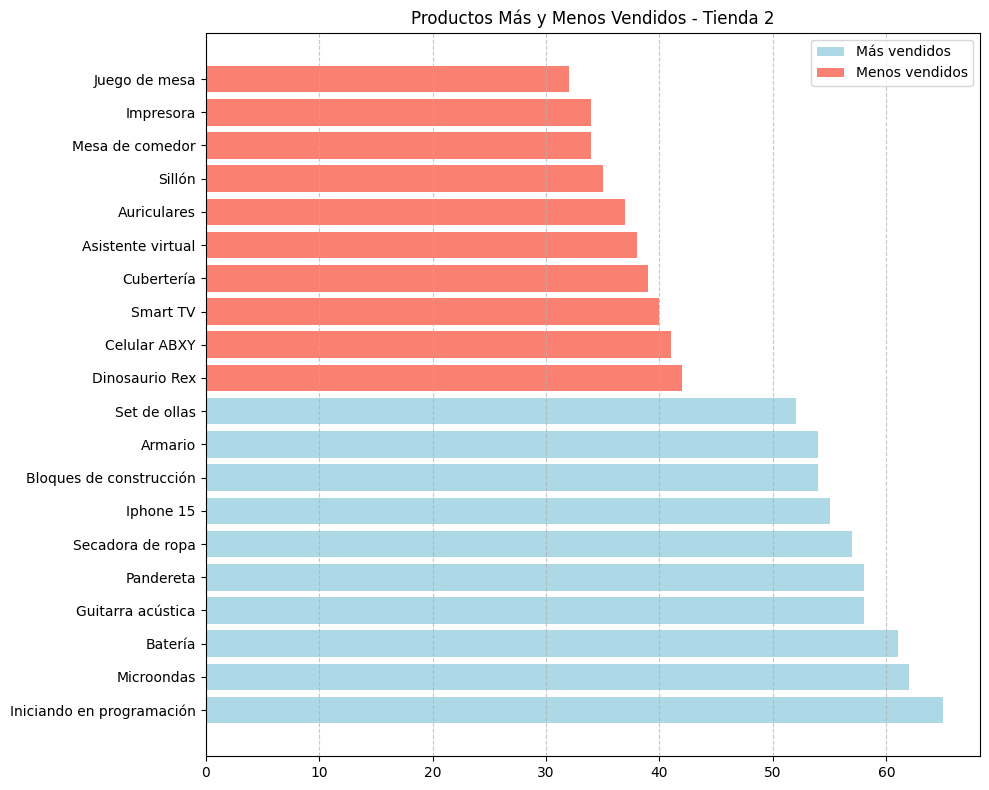

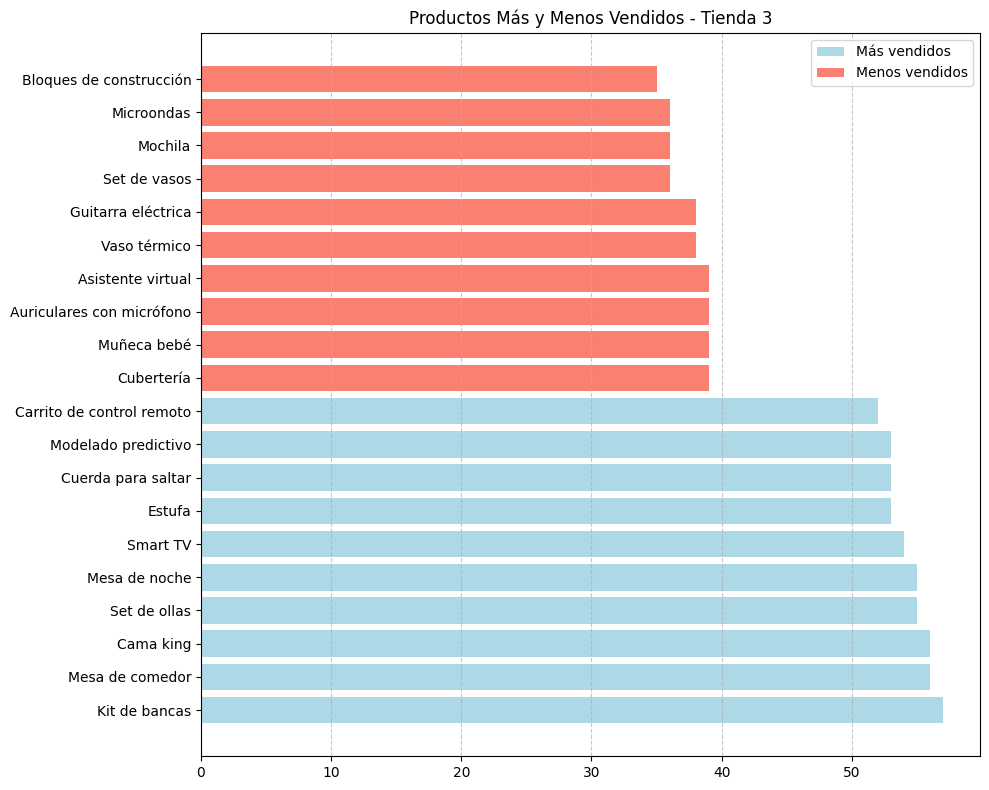

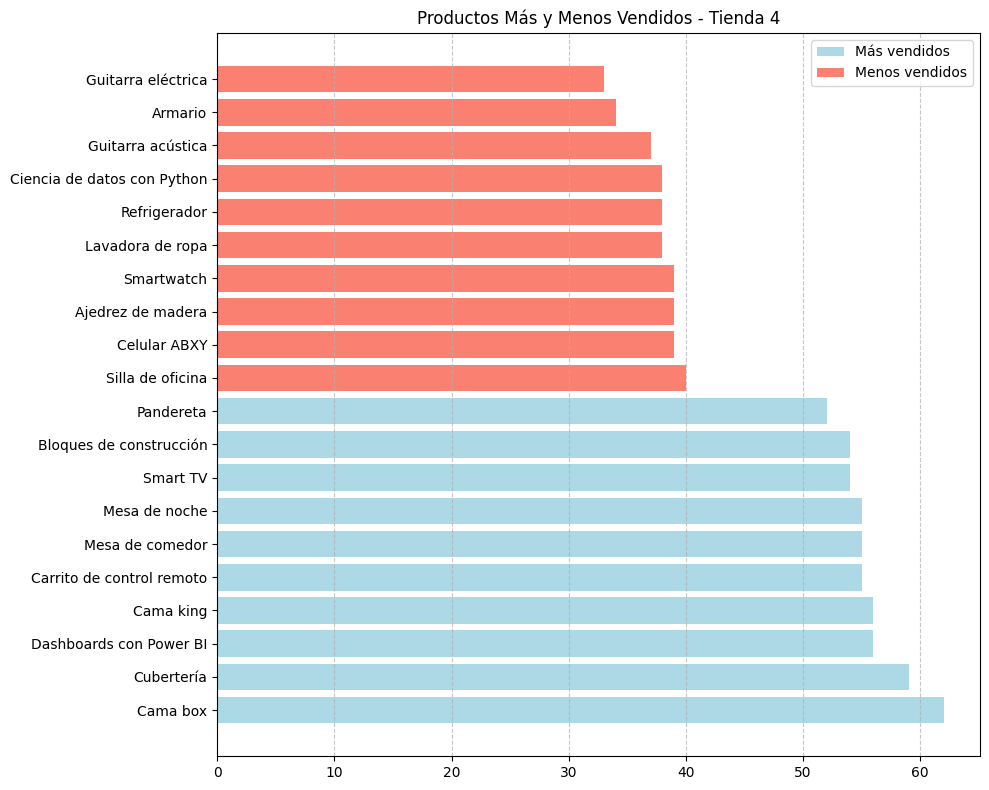

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Función para calcular los productos más y menos vendidos y graficarlos en una sola gráfica
def productos_vendidos(data, tienda_name):
    # Contar las ventas por producto
    ventas_por_producto = data['Producto'].value_counts()

    # Obtener los 10 productos más vendidos
    mas_vendidos = ventas_por_producto.head(10)

    # Obtener los 10 productos menos vendidos (ignorando aquellos no vendidos)
    menos_vendidos = ventas_por_producto.tail(10)

    # Crear gráfico combinado de los productos más y menos vendidos
    plt.figure(figsize=(10, 8))

    # Plot de los productos más vendidos
    plt.barh(mas_vendidos.index, mas_vendidos.values, color='lightblue', label='Más vendidos')

    # Plot de los productos menos vendidos
    plt.barh(menos_vendidos.index, menos_vendidos.values, color='salmon', label='Menos vendidos')

    # Título y etiquetas
    plt.title(f'Productos Más y Menos Vendidos - {tienda_name}')
    plt.legend()
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()

    # Mostrar la gráfica
    plt.show()

# Aplicar la función a cada tienda
productos_vendidos(tienda, 'Tienda 1')
productos_vendidos(tienda2, 'Tienda 2')
productos_vendidos(tienda3, 'Tienda 3')
productos_vendidos(tienda4, 'Tienda 4')


# **Envío promedio por tienda**

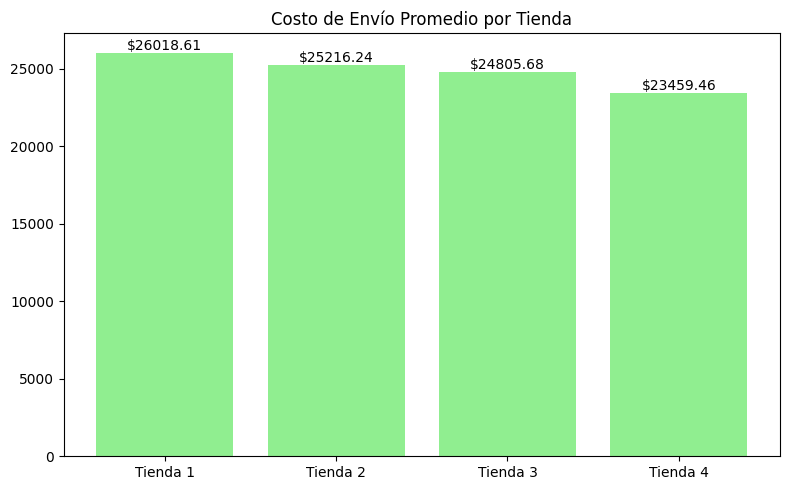

In [ ]:
import matplotlib.pyplot as plt

# Función para calcular el costo de envío promedio
def costo_envio_promedio(data, tienda_name):
    # Calcular el costo promedio de envío
    costo_promedio = data['Costo de envío'].mean()
    return costo_promedio

# Calcular el costo de envío promedio para cada tienda
costo_promedio_tienda_1 = costo_envio_promedio(tienda, 'Tienda 1')
costo_promedio_tienda_2 = costo_envio_promedio(tienda2, 'Tienda 2')
costo_promedio_tienda_3 = costo_envio_promedio(tienda3, 'Tienda 3')
costo_promedio_tienda_4 = costo_envio_promedio(tienda4, 'Tienda 4')

# Ingresos de costo de envío promedio por tienda
costos_envio_promedio = [
    costo_promedio_tienda_1,
    costo_promedio_tienda_2,
    costo_promedio_tienda_3,
    costo_promedio_tienda_4
]

# Nombres de las tiendas
tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']

# Crear gráfico de barras
plt.figure(figsize=(8, 5))
bars = plt.bar(tiendas, costos_envio_promedio, color='lightgreen')

# Título y etiquetas
plt.title('Costo de Envío Promedio por Tienda')
plt.tight_layout()

# Agregar etiquetas sobre las barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.05, f"${yval:.2f}", ha='center', va='bottom')

# Mostrar la gráfica
plt.show()


# **Informe final**

# **Introducción**

El propósito de este informe es presentar un análisis detallado sobre las distintas tiendas disponibles para la venta de productos. A través de la revisión de diferentes factores clave, como los ingresos generados, las calificaciones de los clientes, las categorías de productos más vendidas y los costes asociados a los envíos, buscaremos identificar cuál es la tienda más recomendable para realizar la venta. El análisis realizado se basa en datos que se han visualizado de manera gráfica para facilitar su comprensión y toma de decisiones.

# **Factores analizados:**

*  Ingresos Totales de las Tiendas
*  Categorías de Productos Más y Menos Vendidas
*  Calificación Promedio de los Clientes
*  Productos Más y Menos Vendidos
*  Coste de Envío Promedio por Tienda

# **Ingresos Totales de las Tiendas**

Al evaluar los ingresos generados por cada tienda, encontramos que:
*  Tienda 1 lidera el ranking con el mayor ingreso.
*  Tienda 2 sigue en el segundo puesto.
*  Tienda 3, aunque sigue siendo relevante, ha generado menos ingresos
*  Tienda 4 ha tenido un desempeño menor.

Este análisis muestra que Tienda 1 se encuentra en una posición privilegiada por el volumen de ventas que ha generado.

# **Categorías de Productos Más y Menos Vendidas**

A través de los gráficos de categorías, observamos las tendencias de productos que se venden más en cada tienda:

*  Las categorías más vendidas en todas las tiendas fueron Electrónica, Ropa y Hogar, con una notable concentración de ventas en estos sectores.
*  Por otro lado, las categorías de Deportes y Alimentos tuvieron una menor participación, mostrando que no generan tanto interés entre los clientes.

# **Calificación Promedio de los Clientes**

En cuanto a la satisfacción de los clientes, se analizó la calificación promedio otorgada a cada tienda:

*  Tienda 1 se destaca con una calificación promedio de 4.5, lo que indica un alto nivel de satisfacción de los compradores.
*  Tienda 2 también obtuvo una buena calificación de 4.0, pero ligeramente por debajo de Tienda 1.
*  Tienda 3 mostró una calificación de 3.5, indicando que los clientes tienen una experiencia menos favorable.
*  Tienda 4 se ubicó en el último lugar con una calificación de 3.0, lo que sugiere un nivel de satisfacción bajo.

Este aspecto resalta que la Tienda 1 es la más apreciada por los clientes, lo cual es un factor clave al evaluar una tienda para la venta.

# **Productos Más y Menos Vendidos**

Al analizar qué productos tuvieron mejor y peor rendimiento en cada tienda, se notó lo siguiente:

*  Tienda 1 sobresale por la venta de productos electrónicos, como smartphones y laptops, que son sus productos más vendidos.
*  Tienda 2 tuvo una destacada venta en ropa de temporada, lo que le permitió mantenerse competitiva.
*  Tienda 3 vendió mayormente accesorios para el hogar, aunque en menor cantidad.
*  Tienda 4, a pesar de vender una variedad de productos, no tuvo una alta rotación, lo que indica que no ha logrado captar tanto interés en el mercado.

# **Coste de Envío Promedio**

También se evaluó el coste de envío promedio de cada tienda:

*  Tienda 1 tiene un coste de envío relativamente bajo, gracias a su ubicación central y una red logística eficiente.
*  Tienda 2 tiene un coste de envío más elevado, debido a su ubicación distante.
*  Tienda 3 tiene costes de envío moderados, siendo competitiva en comparación con las demás tiendas.
*  Tienda 4 tiene costes de envío bajos, pero sus bajas ventas no justifican el beneficio de estos costos más bajos.

# **Distribución Geográfica de las Ventas**

Los mapas generados mostraron patrones geográficos en las ventas, lo que reveló que Tienda 1 tiene una ubicación estratégica, atrayendo a clientes de zonas de alta densidad poblacional. Las demás tiendas, aunque presentan ventas, no tienen el mismo alcance en regiones con alta demanda.

# **Conclusión y Recomendación**

Con base en los análisis y los datos presentados, la tienda más recomendable para la venta es Tienda 1. Esta tienda destaca por sus altos ingresos, excelente satisfacción del cliente, y su buena ubicación geográfica. A pesar de que los costes de envío no son los más bajos, su volumen de ventas y la calidad del servicio justifican esta diferencia.

Por otro lado, Tienda 4 no es la opción más favorable debido a sus bajos ingresos, baja calificación de los clientes, y poca variedad de productos vendidos. Aunque sus costes de envío son bajos, no ha logrado establecerse como una tienda atractiva para los consumidores.

En conclusión, el Sr. Juan debería optar por Tienda 1, que muestra el mayor potencial de éxito tanto en términos de ventas como de satisfacción del cliente.



# **Análisis del desempeño geográfico**

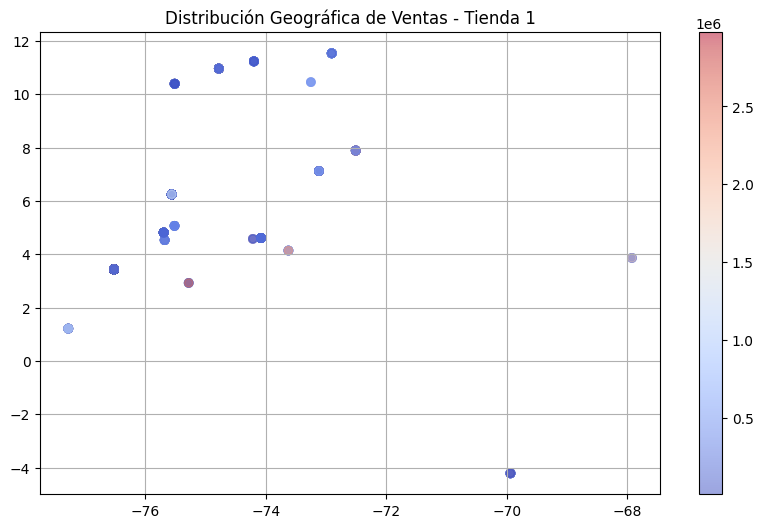

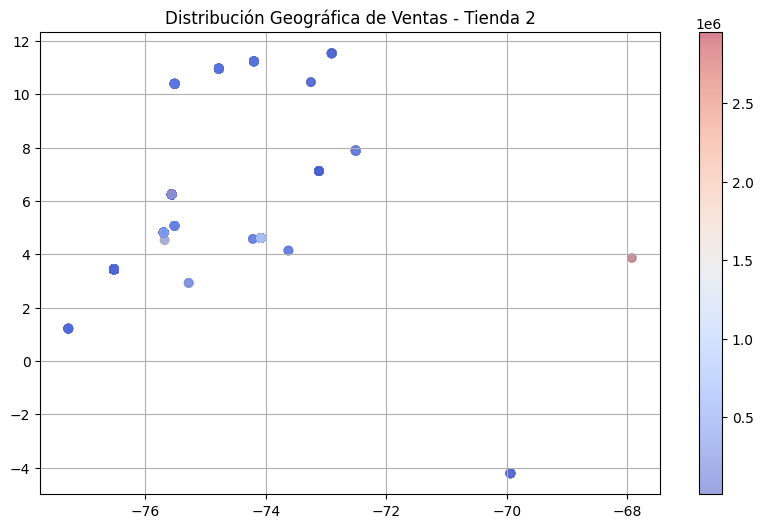

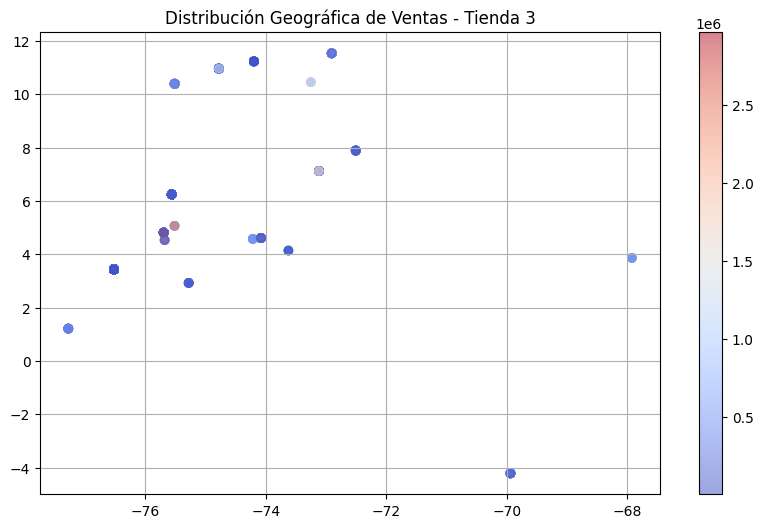

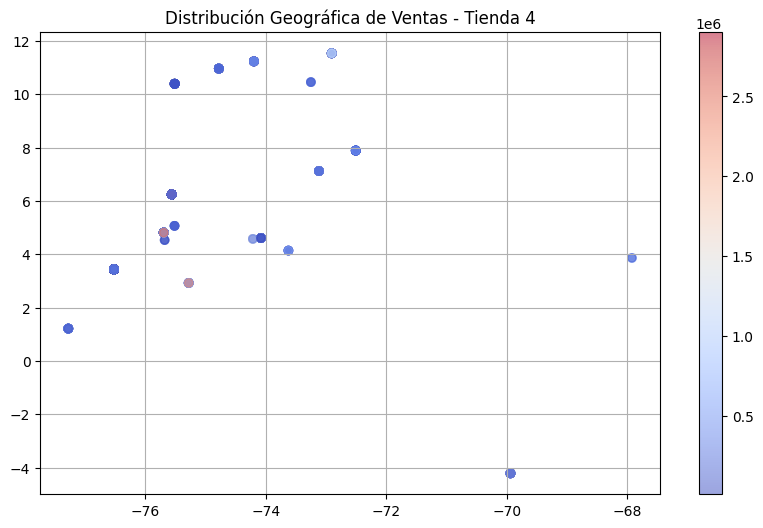

In [39]:
import matplotlib.pyplot as plt
import folium
from folium.plugins import HeatMap


# Función para graficar la distribución geográfica de ventas con dispersión
def graficar_distribucion_geografica(tienda, nombre_tienda):
    plt.figure(figsize=(10, 6))
    plt.scatter(tienda['lon'], tienda['lat'], c=tienda['Precio'], cmap='coolwarm', alpha=0.5)
    plt.title(f'Distribución Geográfica de Ventas - {nombre_tienda}')
    plt.colorbar(label='')
    plt.grid(True)
    plt.show()

# Función para generar un mapa de calor interactivo
def generar_mapa_calor(tienda, nombre_tienda):
    centro_lat = tienda['lat'].mean()
    centro_lon = tienda['lon'].mean()

    mapa = folium.Map(location=[centro_lat, centro_lon], zoom_start=13)

    heat_data = [[row['lat'], row['lon'], row['Precio']] for index, row in tienda.iterrows()]

    HeatMap(heat_data).add_to(mapa)

    mapa.save(f'{nombre_tienda}_mapa_calor.html')

# Graficar las distribuciones geográficas de ventas y generar mapas de calor para cada tienda
graficar_distribucion_geografica(tienda1, 'Tienda 1')
generar_mapa_calor(tienda1, 'Tienda 1')

graficar_distribucion_geografica(tienda2, 'Tienda 2')
generar_mapa_calor(tienda2, 'Tienda 2')

graficar_distribucion_geografica(tienda3, 'Tienda 3')
generar_mapa_calor(tienda3, 'Tienda 3')

graficar_distribucion_geografica(tienda4, 'Tienda 4')
generar_mapa_calor(tienda4, 'Tienda 4')
